<a href="https://colab.research.google.com/github/krishnamhn009/datascience/blob/master/ServerReadWrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [243]:
urlMonthly='/content/sample_data/Server_Disk_Monthly.csv'
urlDaily='/content/sample_data/Server-Read-Write-Response-Daily1.csv'
df = pd.read_csv(urlDaily,encoding = "ISO-8859-1",parse_dates=True) #index_col='ï»¿SampleDate',
# df.index.freq='D'
df.head()

,ï»¿SampleDate,YearOfSample,MonthOfSample,DayOfSample,QuarterOfSample,SqlInstanceName,DatabaseName,CalcNumOfReads,CalcNumOfWrites,CalcNumOfBytesReadPerDay,CalcNumOfBytesWrittenPerDay,CalcNumOfTeraBytesReadPerDay,CalcNumOfTeraBytesWrittenPerDay,CalcSizeOnDiskBytes
0,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,GCM_FS_Work,326269,22,328000000000,180224,0.30,0.00,327000000000
1,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,IFRS9_GCM_Freeze,13684,22,12055314432,180224,0.01,0.00,12884901888
2,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,CreditCore_GCM_Work,1202715,194460,1050000000000,131000000000,0.96,0.12,777000000000
3,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,DBA,27362,-5668,708001792,-1187880960,0.00,0.00,0
4,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,IFRS9_GCM_QA,2910,22,1491812352,180224,0.00,0.00,7516192768


In [164]:
df.columns

Index(['YearOfSample', 'MonthOfSample', 'DayOfSample', 'QuarterOfSample',
       'SqlInstanceName', 'DatabaseName', 'CalcNumOfReads', 'CalcNumOfWrites',
       'CalcNumOfBytesReadPerDay', 'CalcNumOfBytesWrittenPerDay',
       'CalcNumOfTeraBytesReadPerDay', 'CalcNumOfTeraBytesWrittenPerDay',
       'CalcSizeOnDiskBytes'],
      dtype='object')

In [244]:
import datetime
df['SampleDate']=df['ï»¿SampleDate']
#df.drop(columns=['ï»¿SampleDate'])
# df['SampleDate'] = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in df["SampleDate"]]
# df['SampleDate'] = [datetime.datetime.date(d) for d in df['SampleDate']] 
# df['SampleDate']
# df.columns

In [175]:
df.index

RangeIndex(start=0, stop=80048, step=1)

In [245]:
def setIndex(columnName,dataframe):
  dataframe.set_index(columnName, inplace = True)
  dataframe=dataframe.asfreq('D')
  dataframe.index.freq='D'

def getDataSet(databaseName):
  print("input param ",databaseName)
  dfAnalysis=df[(df.DatabaseName == databaseName)]
  setIndex('SampleDate',dfAnalysis)
  return dfAnalysis

# data clean
def cleanDataSet(dfAnalysis):
  dfAnalysis.fillna(0,inplace=True)
  dfAnalysis.round(2) 
  return dfAnalysis

In [247]:
dfAnalysis=getDataSet('IFRS9_SME_Retail_PRD')
dfAnalysis=cleanDataSet(dfAnalysis)
dfAnalysis

input param  IFRS9_SME_Retail_PRD


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,ï»¿SampleDate,YearOfSample,MonthOfSample,DayOfSample,QuarterOfSample,SqlInstanceName,DatabaseName,CalcNumOfReads,CalcNumOfWrites,CalcNumOfBytesReadPerDay,CalcNumOfBytesWrittenPerDay,CalcNumOfTeraBytesReadPerDay,CalcNumOfTeraBytesWrittenPerDay,CalcSizeOnDiskBytes
SampleDate,,,,,,,,,,,,,,
21-07-2020 00:00,21-07-2020 00:00,2020,7,21,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,187423,0,24301527040,0,0.02,0.0,15104278528
22-07-2020 00:00,22-07-2020 00:00,2020,7,22,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,83,0,5275648,0,0.02,0.0,0
23-07-2020 00:00,23-07-2020 00:00,2020,7,23,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,5,0,319488,0,0.02,0.0,0
24-07-2020 00:00,24-07-2020 00:00,2020,7,24,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,149,0,9134080,0,0.02,0.0,0
25-07-2020 00:00,25-07-2020 00:00,2020,7,25,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,223,0,14589952,0,0.02,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-02-2022 00:00,08-02-2022 00:00,2022,2,8,Q1,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,643,0,30031872,0,0.00,0.0,0
09-02-2022 00:00,09-02-2022 00:00,2022,2,9,Q1,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,35,0,1908736,0,0.00,0.0,0
10-02-2022 00:00,10-02-2022 00:00,2022,2,10,Q1,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,693,0,9609216,0,0.00,0.0,0


In [248]:
dfCurrentSizeOnDisk=dfAnalysis[['CalcNumOfBytesReadPerDay']]# CurrentSizeOnDiskTeraBytes ,CurrentSizeOnDiskBytes
dfCurrentSizeOnDisk

,CalcNumOfBytesReadPerDay
SampleDate,
21-07-2020 00:00,24301527040
22-07-2020 00:00,5275648
23-07-2020 00:00,319488
24-07-2020 00:00,9134080
25-07-2020 00:00,14589952
...,...
08-02-2022 00:00,30031872
09-02-2022 00:00,1908736
10-02-2022 00:00,9609216


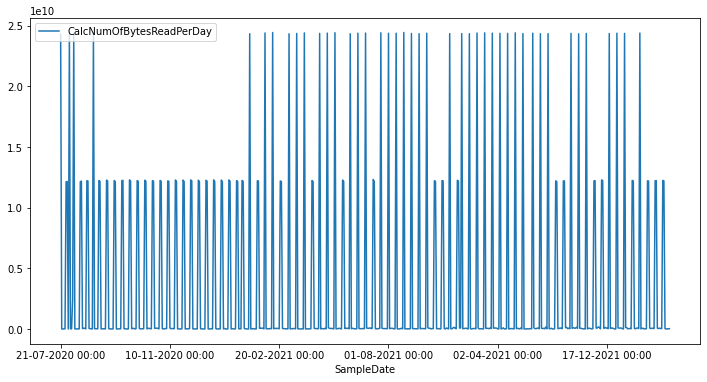

In [249]:
dfCurrentSizeOnDisk.plot(figsize=(12,6))

In [250]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [251]:
# dfCurrentSizeOnDisk.describe()
dfCurrentSizeOnDisk['CalcNumOfBytesReadPerDay']

SampleDate
21-07-2020 00:00    24301527040
22-07-2020 00:00        5275648
23-07-2020 00:00         319488
24-07-2020 00:00        9134080
25-07-2020 00:00       14589952
                       ...     
08-02-2022 00:00       30031872
09-02-2022 00:00        1908736
10-02-2022 00:00        9609216
11-02-2022 00:00       15892480
12-02-2022 00:00       23273472
Name: CalcNumOfBytesReadPerDay, Length: 558, dtype: int64

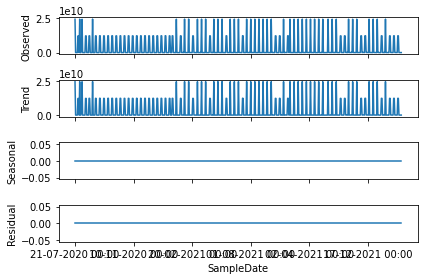

In [252]:
#dfCurrentSizeOnDisk['SampleDate'] = dfCurrentSizeOnDisk.date
#dfCurrentSizeOnDisk.index = pd.DatetimeIndex(dfCurrentSizeOnDisk["ï»¿SampleDate"].asfreq(freq='D'))
results = seasonal_decompose(dfCurrentSizeOnDisk['CalcNumOfBytesReadPerDay'], freq=1) #CurrentSizeOnDiskBytes ...freq=1 for day 
results.plot();

In [319]:
data_length=len(dfCurrentSizeOnDisk)

In [320]:
#keeping test for last 12 days
testFor=12
train = dfCurrentSizeOnDisk.iloc[:data_length-testFor]
test = dfCurrentSizeOnDisk.iloc[data_length-testFor:]
print(train)
print(test)

                  CalcNumOfBytesReadPerDay
SampleDate                                
21-07-2020 00:00               24301527040
22-07-2020 00:00                   5275648
23-07-2020 00:00                    319488
24-07-2020 00:00                   9134080
25-07-2020 00:00                  14589952
...                                    ...
27-01-2022 00:00                  60784640
28-01-2022 00:00                  50298880
29-01-2022 00:00                  26091520
30-01-2022 00:00               12227108864
31-01-2022 00:00               12234342400

[546 rows x 1 columns]
                  CalcNumOfBytesReadPerDay
SampleDate                                
01-02-2022 00:00                  70918144
02-02-2022 00:00                  32636928
03-02-2022 00:00                  70549504
04-02-2022 00:00                  39108608
05-02-2022 00:00                  26009600
06-02-2022 00:00               12251815936
07-02-2022 00:00               12205416448
08-02-2022 00:00              

In [321]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [322]:
dfCurrentSizeOnDisk.head(),dfCurrentSizeOnDisk.tail()

(                  CalcNumOfBytesReadPerDay
 SampleDate                                
 21-07-2020 00:00               24301527040
 22-07-2020 00:00                   5275648
 23-07-2020 00:00                    319488
 24-07-2020 00:00                   9134080
 25-07-2020 00:00                  14589952,
                   CalcNumOfBytesReadPerDay
 SampleDate                                
 08-02-2022 00:00                  30031872
 09-02-2022 00:00                   1908736
 10-02-2022 00:00                   9609216
 11-02-2022 00:00                  15892480
 12-02-2022 00:00                  23273472)

In [323]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [324]:
scaled_train[:10]

array([[9.94050384e-01],
       [2.07759064e-04],
       [5.02642896e-06],
       [3.65588933e-04],
       [5.88762379e-04],
       [4.96644691e-01],
       [4.97202625e-01],
       [5.79714807e-05],
       [9.97501195e-01],
       [6.42042526e-04]])

In [325]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [326]:
# define generator
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [327]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[9.94050384e-01 2.07759064e-04 5.02642896e-06 3.65588933e-04
 5.88762379e-04 4.96644691e-01 4.97202625e-01]
Predict this y: 
 [[5.79714807e-05]]


In [328]:
X.shape

(1, 7, 1)

In [329]:
# We do the same thing, but now instead for 30 months
n_input = 30
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [330]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [331]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [332]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100)               40800     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [333]:
# fit model
model.fit(generator,epochs=26)

Epoch 1/26
516/516 [==============================] - 9s 15ms/step - loss: 0.0858
Epoch 2/26
516/516 [==============================] - 8s 15ms/step - loss: 0.0632
Epoch 3/26
516/516 [==============================] - 8s 15ms/step - loss: 0.0532
Epoch 4/26
516/516 [==============================] - 10s 19ms/step - loss: 0.0493
Epoch 5/26
516/516 [==============================] - 8s 15ms/step - loss: 0.0461
Epoch 6/26
516/516 [==============================] - 7s 13ms/step - loss: 0.0418
Epoch 7/26
516/516 [==============================] - 12s 22ms/step - loss: 0.4092
Epoch 8/26
516/516 [==============================] - 11s 22ms/step - loss: 0.0420
Epoch 9/26
516/516 [==============================] - 7s 14ms/step - loss: 0.0397
Epoch 10/26
516/516 [==============================] - 7s 13ms/step - loss: 0.0360
Epoch 11/26
516/516 [==============================] - 7s 14ms/step - loss: 0.0339
Epoch 12/26
516/516 [==============================] - 7s 14ms/step - loss: 0.0338
Epoch 13/2

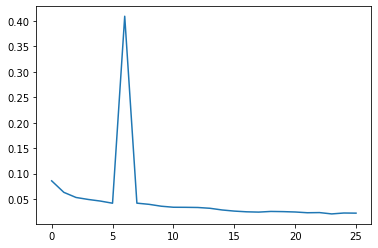

In [334]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [335]:
last_train_batch = scaled_train[-30:]

In [336]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [337]:
model.predict(last_train_batch) #predicted value

array([[0.00679942]], dtype=float32)

In [338]:
scaled_test[0] #actual value

array([0.00289288])

In [339]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [340]:
test_predictions

[array([0.00679942], dtype=float32),
 array([0.00746039], dtype=float32),
 array([0.00441889], dtype=float32),
 array([0.00751019], dtype=float32),
 array([0.01496521], dtype=float32),
 array([0.5330103], dtype=float32),
 array([0.41953725], dtype=float32),
 array([0.03871504], dtype=float32),
 array([0.02511317], dtype=float32),
 array([0.01330564], dtype=float32),
 array([0.00814798], dtype=float32),
 array([0.03624583], dtype=float32)]

In [341]:
test.head()

,CalcNumOfBytesReadPerDay
SampleDate,
01-02-2022 00:00,70918144
02-02-2022 00:00,32636928
03-02-2022 00:00,70549504
04-02-2022 00:00,39108608
05-02-2022 00:00,26009600


In [342]:
true_predictions = scaler.inverse_transform(test_predictions)

In [343]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


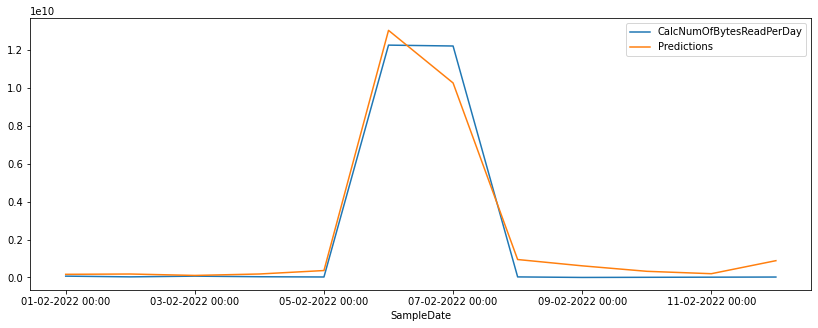

In [344]:
test.plot(figsize=(14,5))

In [359]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['CalcNumOfBytesReadPerDay'],test['Predictions']))
print(rmse)

745400955.3167585


In [357]:
test['CalcNumOfBytesReadPerDay']

test['CalcNumOfBytesReadPerDay'].astype('float64')

SampleDate
01-02-2022 00:00    7.091814e+07
02-02-2022 00:00    3.263693e+07
03-02-2022 00:00    7.054950e+07
04-02-2022 00:00    3.910861e+07
05-02-2022 00:00    2.600960e+07
06-02-2022 00:00    1.225182e+10
07-02-2022 00:00    1.220542e+10
08-02-2022 00:00    3.003187e+07
09-02-2022 00:00    1.908736e+06
10-02-2022 00:00    9.609216e+06
11-02-2022 00:00    1.589248e+07
12-02-2022 00:00    2.327347e+07
Name: CalcNumOfBytesReadPerDay, dtype: float64

In [358]:
test['Predictions']


SampleDate
01-02-2022 00:00    1.664206e+08
02-02-2022 00:00    1.825790e+08
03-02-2022 00:00    1.082242e+08
04-02-2022 00:00    1.837964e+08
05-02-2022 00:00    3.660479e+08
06-02-2022 00:00    1.303058e+10
07-02-2022 00:00    1.025653e+10
08-02-2022 00:00    9.466547e+08
09-02-2022 00:00    6.141328e+08
10-02-2022 00:00    3.254767e+08
11-02-2022 00:00    1.993884e+08
12-02-2022 00:00    8.862905e+08
Name: Predictions, dtype: float64